In [1]:
# Introduction 

It is not surprising to say that companies suffer from their customers churn. In this particular case, a telecommunication Company in island suffers financially (in the form of revenue) when their customers churns. The customers are not satisfied with company's services and their high rates. Due to that, they are looking to create a retention program in the form of providing discounts for customers who are likely to churn. However, they are concerned with the profitability of the retention program, and therefore, are only willing to provide discounts to customers that are of value.

# Objective

Predict customers who are likely to churn by building predictive model
 

Determine which customers are profitable for retention

# Import Libraries

In [2]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd  # primary data structure library
import seaborn as sns
import matplotlib.ticker as mtick
# we are using the inline backend
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')


import matplotlib as mpl
import matplotlib.pyplot as plt


# Data Set

Now we are ready to read in our data


In [3]:
df=pd.read_excel('E:/My Projects/Customer churn/data_set.xlsx')


Let's view the top 5 rows of the dataset using the head() function.

#  Data Understanding and Exploration

In [4]:
df.head(10)
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,3355,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,1516,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,116,1,0,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,18,117,408,425,0,0,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,49,141,415,163,1,1,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [5]:
df.tail(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4990,28,140,510,1949,0,0,0,244.7,115,41.60,...,101,21.98,231.3,112,10.41,7.5,6,2.03,1,1
4991,3,97,510,4367,0,0,0,252.6,89,42.94,...,91,28.93,256.5,67,11.54,8.8,5,2.38,1,1
4992,26,83,415,1476,0,0,0,188.3,70,32.01,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4993,49,73,408,4467,0,0,0,177.9,89,30.24,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4994,27,75,408,4726,0,0,0,170.7,101,29.02,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


We can also view the bottom 5 rows of the dataset using the tail() function.

##### When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method.

###### This method can be used to get a short summary of the dataframe.

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

##### All features datatypes are numerical: int64 and float64. There is no categorical data to convert in numerical data.

#### To get the list of column headers we can call upon the data frame's columns instance variable.


In [7]:
df.rename(columns={'class':'churn'})

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


Similarly, to get the list of indices we use the .index instance variables.

In [8]:
df.index

RangeIndex(start=0, stop=5000, step=1)

To view the dimensions of the dataframe, we use the shape instance variable of it.

In [9]:
# size of dataframe (rows, columns)
df.shape    

(5000, 21)

With a quick glance of data set,we can see that there are 21 columns and 5000 rows in total. We see that there are some data in numerical form, which would be phone number, total_minutes, total_charges, and number_customer_service_calls. Contradictingly, the total charges column was listed as a numerical data type (int64, float64). Demographic info about customers, who use international_plan, voice_mail_plan and nunmber_vmail_messages. This calls for data cleaning and manipulation, so let us find out what our data looks like and fix any issue we find

# Data Cleaning 

In [10]:
df.drop("phone_number", axis=1, inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


##### Droped Phone number as it is unnecessory feature for dataset

##### We will also add a 'Total' column that sums up the total numbers of minutes, calls, charges, and number of customer service calls as follows:

In [11]:
df['Total'] = df.sum(axis=1)

We can check to see how many null objects we have in the dataset as follows:

In [12]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
Total                            0
dtype: int64

There is no any null object in the dataset (no empty cell) 

# Exploratory Analysis

Lets identify the Categorical vs Numerical features

In [13]:
corr_abs=df.corr().abs()
corr_abs
sol= (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                                        .stack()
                                         .sort_values(ascending=False))
sol

<ipython-input-13-92e2259c1847>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol= (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))


total_day_minutes      total_day_charge         1.000000
total_eve_minutes      total_eve_charge         1.000000
total_night_minutes    total_night_charge       0.999999
total_intl_minutes     total_intl_charge        0.999993
voice_mail_plan        number_vmail_messages    0.954508
                                                  ...   
total_night_calls      total_intl_calls         0.000156
total_eve_charge       total_intl_charge        0.000155
total_eve_minutes      total_intl_minutes       0.000137
total_eve_charge       total_intl_minutes       0.000132
number_vmail_messages  total_intl_calls         0.000124
Length: 210, dtype: float64

The more you use minutes, the more you have to pay charges. This is strong correlated fixed relationship.


Let's drop the features with highest correlation pair. 


In [14]:
#Dropping charge columns which are 99% correlated to their corresponding minutes columns
df.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis=1, inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,class,Total
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1681.76
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1601.44
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1517.69
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1416.60
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1453.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2,0,1727.19
4996,49,152,415,0,0,0,184.2,90,256.8,73,213.6,113,14.7,2,3,1,1634.02
4997,7,61,415,0,0,0,140.6,89,172.8,128,212.4,97,13.6,4,1,0,1393.22
4998,7,109,510,0,0,0,188.8,67,171.7,92,224.4,89,8.5,6,0,0,1532.49


So, I have dropped charge columns which are 99% correlated to their corresponding minutes columns.

### Plotting graphs

array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'area_code'}>,
        <AxesSubplot:title={'center':'international_plan'}>],
       [<AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>],
       [<AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>],
       [<AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:title={'center':'class'}>],
       [<AxesSubplot:title={'center':'Total'}>, <AxesSubpl

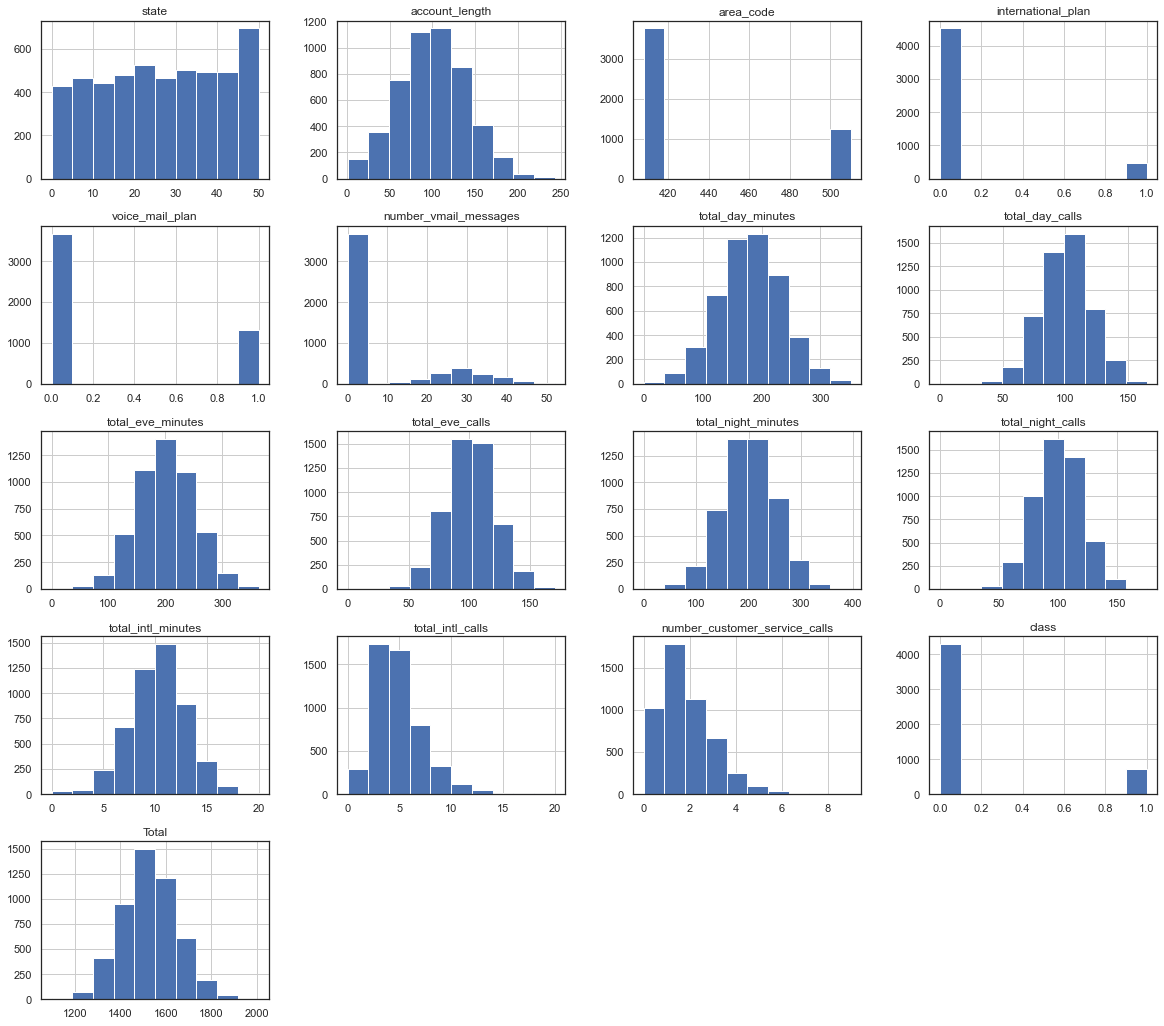

In [15]:
# It only plots numerical data 
df.hist(figsize=(20,18))


##### As above graphs has shown. There are some features which are inbalance or a bit biased which can be biased our machine learning models as well and this will impact on business. Such as, number of customers of service calls, number of voice mail messages, area_code,international_plan, and voice mail plan.

##### We have to look after these inbalance features before building a model.


### Plot bar plot for churn percentage

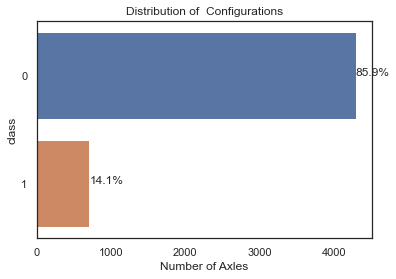

In [16]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "class")

#### Our output variable is churn or class. Churn is divide into class 0 and 1. The most of customers are not churn means 0 but few of the data has churned. Number of churn are limited but they do large impact on business. 

##### Finally, let's view a quick summary of each column in our dataframe using the describe() method.


In [17]:
df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,class,Total
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,0.094600,0.264600,7.755200,180.288900,100.029400,200.636560,100.191000,200.391620,99.919200,10.261780,4.435200,1.570400,0.141400,1528.641178
std,14.80348,39.69456,42.209182,0.292691,0.441164,13.546393,53.894699,19.831197,50.551309,19.826496,50.527789,19.958686,2.761396,2.456788,1.306363,0.348469,121.272658
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1098.840000
25%,13.00000,73.00000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,166.375000,87.000000,166.900000,87.000000,8.500000,3.000000,1.000000,0.000000,1448.455000
50%,26.00000,100.00000,415.000000,0.000000,0.000000,0.000000,180.100000,100.000000,201.000000,100.000000,200.400000,100.000000,10.300000,4.000000,1.000000,0.000000,1527.495000
75%,39.00000,127.00000,415.000000,0.000000,1.000000,17.000000,216.200000,113.000000,234.100000,114.000000,234.700000,113.000000,12.000000,6.000000,2.000000,0.000000,1608.140000
max,50.00000,243.00000,510.000000,1.000000,1.000000,52.000000,351.500000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000,2006.930000


## Why customers are churn

C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ntech\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

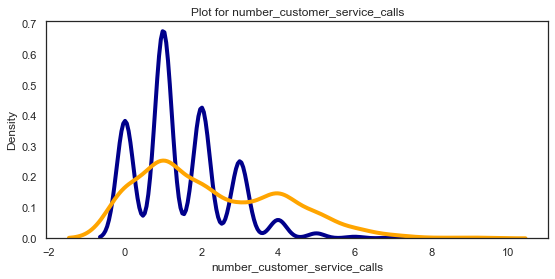

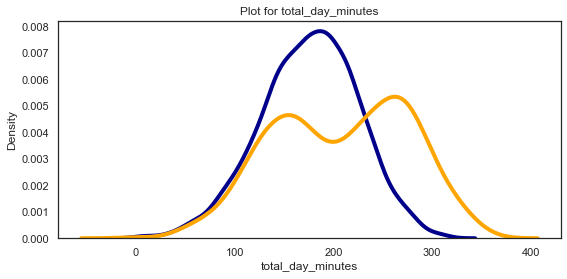

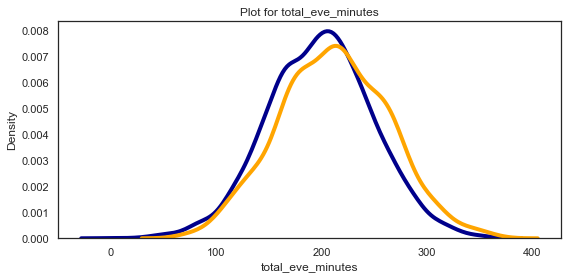

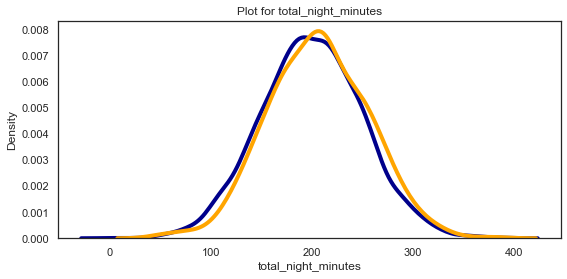

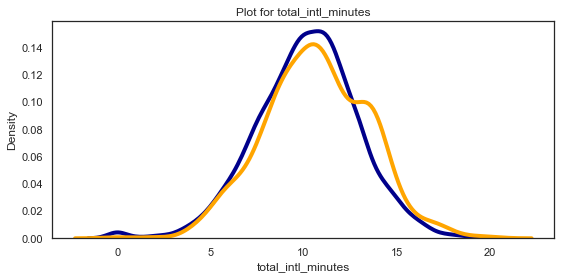

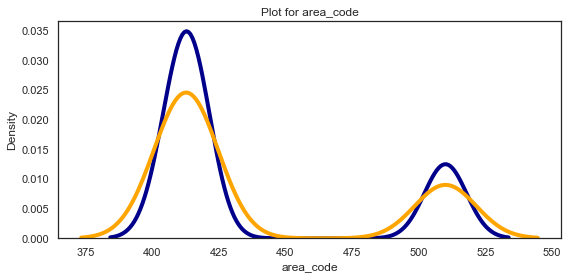

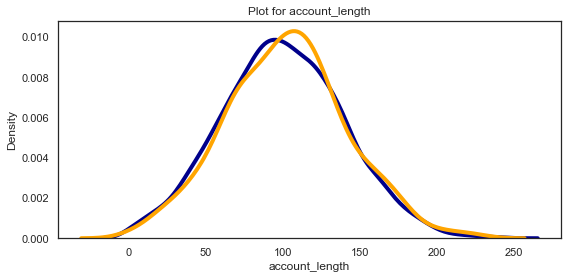

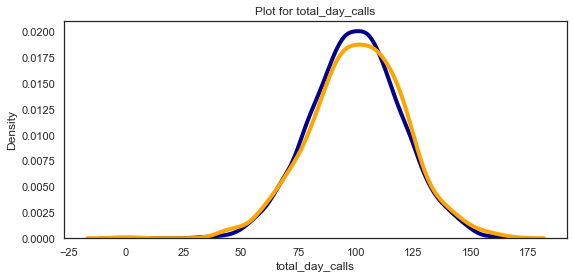

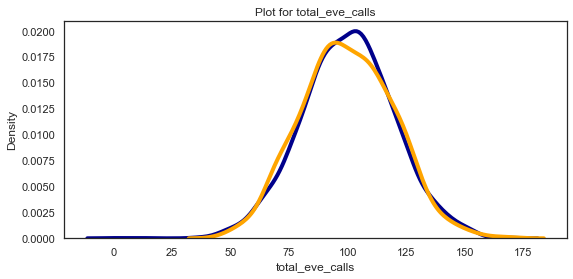

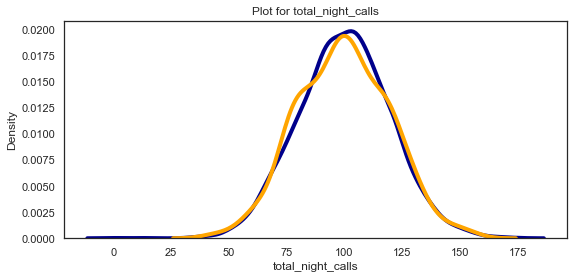

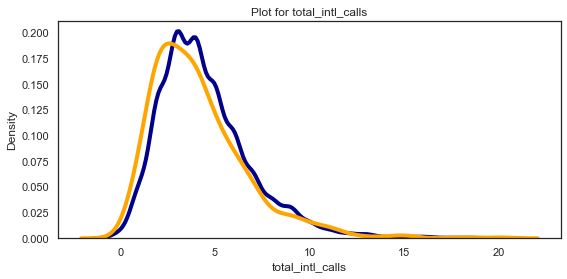

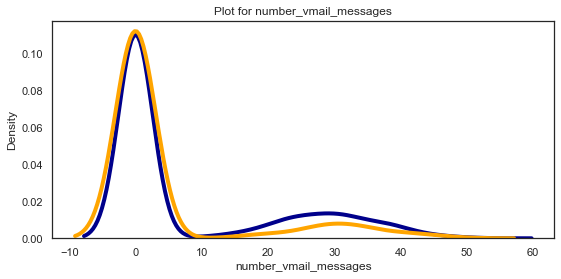

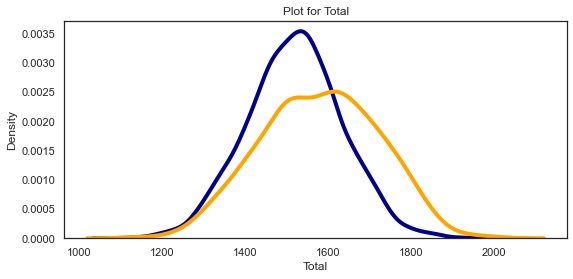

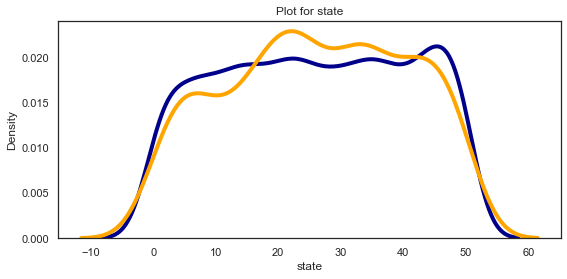

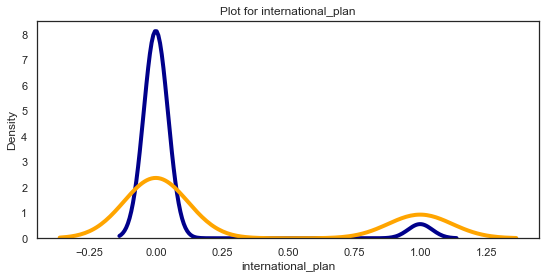

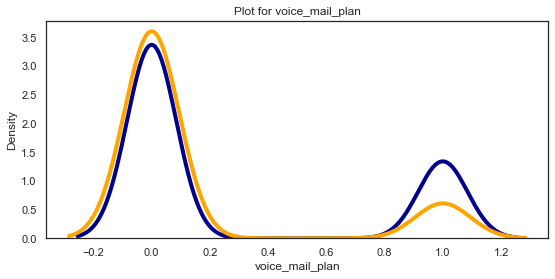

In [18]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['class'] == 0][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue', label= 'class: no',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['class'] == 1][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange', label= 'class: yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

kdeplot('number_customer_service_calls', hist = False, kde = True)
kdeplot('total_day_minutes', hist = False, kde = True)
kdeplot('total_eve_minutes', hist = False, kde = True)
kdeplot('total_night_minutes', hist = False, kde = True)
kdeplot('total_intl_minutes', hist = False, kde = True)
kdeplot('area_code', hist = False, kde = True)
kdeplot('account_length', hist = False, kde = True)
kdeplot('total_day_calls', hist = False, kde = True)
kdeplot('total_eve_calls', hist = False, kde = True)
kdeplot('total_night_calls', hist = False, kde = True)
kdeplot('total_intl_calls', hist = False, kde = True)
kdeplot('number_vmail_messages', hist = False, kde = True)
kdeplot('Total', hist = False, kde = True)
kdeplot('state', hist = False, kde = True)
kdeplot('international_plan', hist = False, kde = True)
kdeplot('voice_mail_plan', hist = False, kde = True)

#### From the plots above we extract some facts which are causing customers churn as follows:



- Customers are churning mostly in total night minutes  
- Users with higher number of vmail messages are likely to churn
- User with long account_length are also more likely to churn
- Total have similar property of above
- Something has wrong with vmail plan also


### Suggestions

#### You should use higher bandwidth for your better connection of long account_length. It would be solve the issue of voice mail services too. Due to increase in voice messages customers are churning. Check you voice mail services and fix it.


# Numerical features

In [19]:
# As we know that the data has sampling issue for couple of features
# as well as the target(output) variable.

#creating a filter where churn ='yes'
y_true=df[df['class']==1]


print("We are interested in the Yes class, but has less data =", y_true.shape[0]/df['class'].shape[0]*100)

We are interested in the Yes class, but has less data = 14.14


In [20]:
df.shape

(5000, 17)

In [21]:
# let's seperate out the output variable 'Class'
y=df['class']
y.size

5000

In [22]:
# let's prepare the features (Data matrix)
X= df.loc[:,df.columns!='class']
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,Total
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,1681.76
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,1601.44
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,1517.69
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1416.60
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1453.09


In [23]:
X.shape

(5000, 16)

#### Transform and Fit the data to Features on same scale. It is necessory for building the model

In [24]:
from sklearn import preprocessing

In [25]:
# Let's standardize the data
# standardizing data can help features arrive in more digestible form for these algorithms.
# A quick difference between normalize data and standardize data.

# Normalize data usually mean to scale a variable to have a values between 0 to 1 
# While standarization transform data to have a mean of zero and a standard deviation of 1.

scaler=preprocessing.StandardScaler()
X= scaler.fit_transform(X)
X

array([[-0.6754763 ,  0.69894149, -0.51916645, ..., -0.58423577,
        -0.43667564,  1.26272598],
       [ 0.60813405,  0.16984882, -0.51916645, ..., -0.58423577,
        -0.43667564,  0.60035052],
       [ 0.33790029,  0.92569549, -0.51916645, ...,  0.22991664,
        -1.20223603, -0.09031115],
       ...,
       [-1.28350225, -0.98911606, -0.51916645, ..., -0.17715957,
        -0.43667564, -1.1167787 ],
       [-1.28350225,  0.2202386 ,  1.73175375, ...,  0.63699285,
        -1.20223603,  0.03174011],
       [ 1.35127687, -0.35924384, -0.51916645, ...,  4.70775494,
        -1.20223603, -0.08132224]])

#### We use standardize method to bring all features on the same scale 0 as mean and 1 as standard deviation. Standardize is prefer more over normalize for getting solutions. 

# Building Models to Predict 


Try different models to check better accuracy 

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10)

# Implement Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(gb_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for Gradient Boost Classifier", n_correct/len(y_pred))
    

Results for Gradient Boost Classifier 0.952
Results for Gradient Boost Classifier 0.944
Results for Gradient Boost Classifier 0.952
Results for Gradient Boost Classifier 0.962
Results for Gradient Boost Classifier 0.958
Results for Gradient Boost Classifier 0.954
Results for Gradient Boost Classifier 0.96
Results for Gradient Boost Classifier 0.938
Results for Gradient Boost Classifier 0.952
Results for Gradient Boost Classifier 0.972


#### We use StartifiedKFold library for eqaully distribute data in to train and test for multiple splits in order to save from any biased or inbalance results.

In [27]:

# Implement Support Vector Machine (SVM)
from sklearn.svm import SVC
svc_clf= SVC()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(svc_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for Support Vector Machine ", n_correct/len(y_pred))
    

Results for Support Vector Machine  0.928
Results for Support Vector Machine  0.916
Results for Support Vector Machine  0.924
Results for Support Vector Machine  0.932
Results for Support Vector Machine  0.934
Results for Support Vector Machine  0.92
Results for Support Vector Machine  0.932
Results for Support Vector Machine  0.916
Results for Support Vector Machine  0.902
Results for Support Vector Machine  0.934


In [28]:

# Implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(rf_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for RandomForest Classifier", n_correct/len(y_pred))
    

Results for RandomForest Classifier 0.952
Results for RandomForest Classifier 0.95
Results for RandomForest Classifier 0.952
Results for RandomForest Classifier 0.966
Results for RandomForest Classifier 0.956
Results for RandomForest Classifier 0.952
Results for RandomForest Classifier 0.964
Results for RandomForest Classifier 0.946
Results for RandomForest Classifier 0.958
Results for RandomForest Classifier 0.976


In [29]:

# Implement KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
kn_clf= KNeighborsClassifier()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(kn_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for KNeighbors Classifier ", n_correct/len(y_pred))
    

Results for KNeighbors Classifier  0.904
Results for KNeighbors Classifier  0.894
Results for KNeighbors Classifier  0.896
Results for KNeighbors Classifier  0.892
Results for KNeighbors Classifier  0.898
Results for KNeighbors Classifier  0.896
Results for KNeighbors Classifier  0.904
Results for KNeighbors Classifier  0.894
Results for KNeighbors Classifier  0.88
Results for KNeighbors Classifier  0.904


In [30]:

# Implement DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(dt_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for DecisionTree Classifier ", n_correct/len(y_pred))
    

Results for DecisionTree Classifier  0.894
Results for DecisionTree Classifier  0.9
Results for DecisionTree Classifier  0.912
Results for DecisionTree Classifier  0.914
Results for DecisionTree Classifier  0.914
Results for DecisionTree Classifier  0.916
Results for DecisionTree Classifier  0.93
Results for DecisionTree Classifier  0.896
Results for DecisionTree Classifier  0.92
Results for DecisionTree Classifier  0.922


In [31]:

# Implement LogisticRegression Classifier
from sklearn.linear_model import LogisticRegression
log_clf= LogisticRegression()

for train_index, test_index in skfolds.split(X,y):
    clone_clf=clone(log_clf)
    X_train_folds=X[train_index]
    y_train_folds=y[train_index]
    X_test_folds=X[test_index]
    y_test_folds=y[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Results for Logistic Regression Classifier ", n_correct/len(y_pred))
    

Results for Logistic Regression Classifier  0.86
Results for Logistic Regression Classifier  0.88
Results for Logistic Regression Classifier  0.852
Results for Logistic Regression Classifier  0.862
Results for Logistic Regression Classifier  0.864
Results for Logistic Regression Classifier  0.87
Results for Logistic Regression Classifier  0.866
Results for Logistic Regression Classifier  0.87
Results for Logistic Regression Classifier  0.858
Results for Logistic Regression Classifier  0.874


#### From the above results the Gradient Boost Classifier has best accuracy amongst the all Classifiers. 

#### This is not the right way to calculate accuracy for classifier. There are methods like confussion matrix, F1 score for the measuring accuracy of classifier. 

#### So far we have implemented different Modern Classifiers, but strangely they are only slightly better than my random guessing.

##### So we cannot look into just "accuracy", but also explore the precision-recall or ROC as well.

In [32]:
#Let's evaluate the Confusion Matrix
#All the Classifiers that we have built so far are: gb_clf, svc_clf , rf_clf, knn_clf, dt_clf, log_clf
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(gb_clf,X,y,cv=10)
y_train_pred=cross_val_predict(gb_clf,X_train_folds,y_train_folds,cv=10)

from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

# In a Confusion matrix 
#each row represent actual class 
# each column represent predicted class

array([[4252,   41],
       [ 187,  520]], dtype=int64)

#### In the First Row of the confusion matrix 
- 4252 are not churn and my code correctly predicted no churn. (True negatives)
- 41 were wrongly classified as no churn (Also known as False Positives)

##### In the Second Row of the confusion matrix
- 187 were churn and my code correctly predicted churn. (True positives)
- 520 were not wrongly classified as churn (Also known as False negatives)


In [33]:
# We are now interested in two terms
#Precision =TP/(TP+FP)
#Recall=TP/(TP+FN)

#So, in this particular problem it's okay to predict that a person is going to churn even if it in reality 
# he/she is not going to churn 
# This situation is still okay. This is used to calculate precision. 

#however, if we predict a person is not going to churn, but in fact that person is going to churn then
#it could mean loss of business. This is used to calculate Recall. 

#Hence in our case Recall is more important.

#Precision for our gp_clf classifier
from sklearn.metrics import precision_score, recall_score
print('The Precision is : ', precision_score(y,y_pred))
print('The Recall is : ', recall_score(y_train_folds,y_train_pred))

The Precision is :  0.9269162210338681
The Recall is :  0.7311320754716981


In [34]:
# Okay what should we do next. Our ML algorithm is not great now. 
#It could happen that the threshold is not properly set for the decision masking.
#So a simple thing is to move the threshold (decision boundary) up or down
#But Scikit-learn library does not let to change that threshold directly.
# also how to decide which threshold to use?
#But there is a way for that
# we can find the threshold and plot it against precision-recall.
y_scores=cross_val_predict(gb_clf,X,y,cv=10,method="decision_function")

#using this y_scores we can find the threshold
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds= precision_recall_curve(y, y_scores)

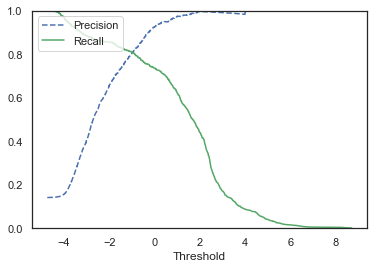

In [35]:
#Plot the Precision-Recall curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

Text(0, 0.5, 'Precision')

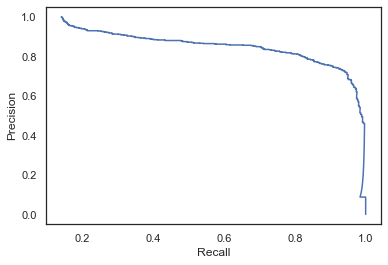

In [36]:
#A better way is to #Plot precision against recall
plt.plot(precisions,recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
#Let's target for 80% recall

In [37]:
y_scores

array([-2.96819627, -3.34971727, -3.54278841, ..., -3.25118602,
       -3.7036551 , -4.07901036])

In [38]:
# let's try by using a new threshold.
#Previous precision and recall with Gradient Boost Classifier 
#The precision is :0.92
#The recall is : 0.73
# To get to 80% recall, we need a threshold
y_new_scores=(y_scores>-0.5)
print("The new precision is :", precision_score(y,y_new_scores))
print("The new recall is: ",recall_score(y,y_new_scores))

The new precision is : 0.869983948635634
The new recall is:  0.7666195190947667


## How to retain Customers who are likely to churn

##### So by changing the classifier threshold we can change the precision and recall depending on the demand of the project and 
##### business requirement.
##### Here we were able to improve the recall at the expense of the precision.
##### but for the business recall is more important.
##### say, if we want to improve churn by giving more talk time, discounts on recharges and other promotions
##### Its okay to give customers these offers whom we thought would churn(but in reality may be would not.)
##### But that way at least we can try to stop the actual churn. 

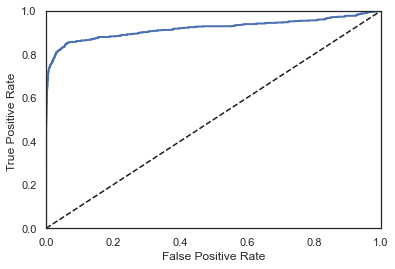

In [39]:
#Okay last thing that we will check in ROC curve
# The receiver operating characteristics (ROC) curve is another common tool used with binary classifiers.
#It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
# curve plots the true positive rate (another name for recall) against the false positive rate.

from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate ")
plot_roc_curve(fpr,tpr)
plt.show()